### 음성 데이터 자동 변환 및 저장

이번에는 background 폴더와 event 폴더에 있는 wav 파일들을 하나씩 가져와서 자동으로 이미지를 생성하고, 생성된 이미지를 한 폴더에 저장한 후, 저장된 이미지를 `.npy` 형태로 변환하는 과정을 살펴보겠습니다. 이 작업을 위해 다음과 같은 단계를 따릅니다:

1. **폴더에서 음성 파일 불러오기**
2. **음성 파일 합성**
3. **멜 스펙트로그램 생성**
4. **이미지 저장**
5. **이미지를 `.npy` 파일로 변환**

### 단계별 코드

#### 1. 폴더에서 음성 파일 불러오기

```python
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# 배경 및 이벤트 폴더 경로
background_folder = 'path_to_background_folder'
event_folder = 'path_to_event_folder'
output_folder = 'path_to_output_folder'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

background_files = [os.path.join(background_folder, f) for f in os.listdir(background_folder) if f.endswith('.wav')]
event_files = [os.path.join(event_folder, f) for f in os.listdir(event_folder) if f.endswith('.wav')]
```

#### 2. 음성 파일 합성

```python
def synthesize_audio(bg_data, ev_data, sr_bg, sr_ev):
    max_length = sr_bg * 15  # 15초 길이
    start_idx = np.random.randint(0, max(1, len(bg_data) - max_length))
    bg_data = bg_data[start_idx:start_idx + max_length]
    
    start_ev_idx = np.random.randint(0, max(1, max_length - len(ev_data)))
    combined_data = bg_data.copy()
    combined_data[start_ev_idx:start_ev_idx + len(ev_data)] += ev_data
    return combined_data[:max_length]
```

#### 3. 멜 스펙트로그램 생성

```python
def create_mel_spectrogram(audio_data, sr, n_fft=2048, hop_length=512, n_mels=128):
    mel_spec = librosa.feature.melspectrogram(audio_data, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db
```

#### 4. 이미지 저장

```python
def save_mel_spectrogram_image(mel_spec_db, output_path):
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(mel_spec_db, sr=sr_bg, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.savefig(output_path)
    plt.close()
```

#### 5. 전체 과정 실행 및 이미지 저장

```python
for bg_file, ev_file in zip(background_files, event_files):
    # 배경 음성 데이터 로드
    bg_data, sr_bg = librosa.load(bg_file, sr=None)
    # 이벤트 음성 데이터 로드
    ev_data, sr_ev = librosa.load(ev_file, sr=None)
    
    # 데이터 합성
    combined_data = synthesize_audio(bg_data, ev_data, sr_bg, sr_ev)
    
    # 멜 스펙트로그램 생성
    mel_spec_db = create_mel_spectrogram(combined_data, sr_bg)
    
    # 파일명 생성 및 이미지 저장
    output_filename = f"{os.path.basename(bg_file).split('.')[0]}_{os.path.basename(ev_file).split('.')[0]}.png"
    output_path = os.path.join(output_folder, output_filename)
    save_mel_spectrogram_image(mel_spec_db, output_path)
```

#### 6. 이미지 폴더를 `.npy` 파일로 변환

```python
import cv2

image_files = [os.path.join(output_folder, f) for f in os.listdir(output_folder) if f.endswith('.png')]
images = []

for image_file in image_files:
    img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))  # 필요에 따라 크기 조정
    images.append(img)

images = np.array(images)
np.save('output_images.npy', images)
```

이제 음성 데이터를 자동으로 멜 스펙트로그램 이미지로 변환하고, 저장한 이미지를 `.npy` 파일로 변환하는 작업을 완료했습니다. 이 과정을 통해 음성 데이터를 효과적으로 전처리하고, 딥러닝 모델에 사용할 수 있는 형태로 변환할 수 있습니다.

In [ ]:
# 라이브러리 설치
! pip install librosa
! pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00


# 이미지 합성

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import librosa

# 멜 스펙트로그램 설정
n_fft = 2048       # FFT 컴포넌트의 수
hop_length = 512   # 연속적인 프레임 간 샘플 수
n_mels = 128       # 멜 밴드의 수

In [ ]:
import os
background_list = os.listdir('/content/drive/MyDrive/1DL_data_p/background')
background_list

['B_문여닫는소리.wav', 'B_샤워소리.wav']

In [ ]:
event_list = os.listdir('/content/drive/MyDrive/1DL_data_p/event')
event_list

['E_전기사고_111205_label.wav',
 'E_가스사고_691133_label.wav',
 'E_화재_15456_label.wav']

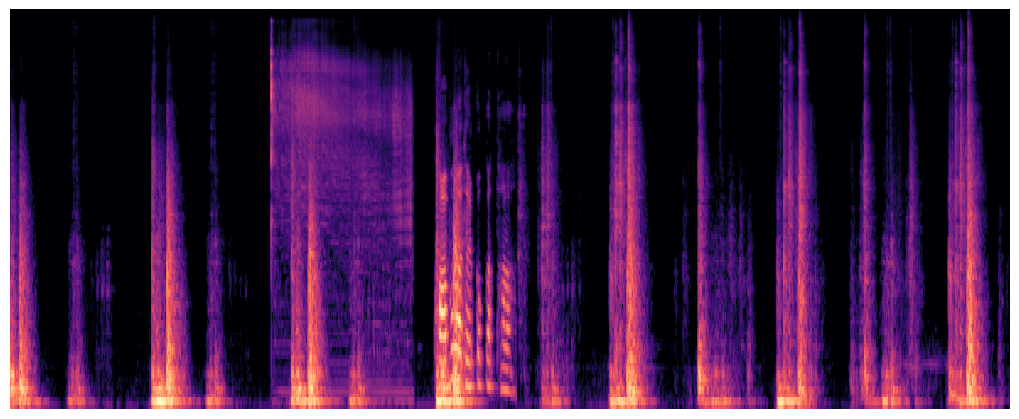

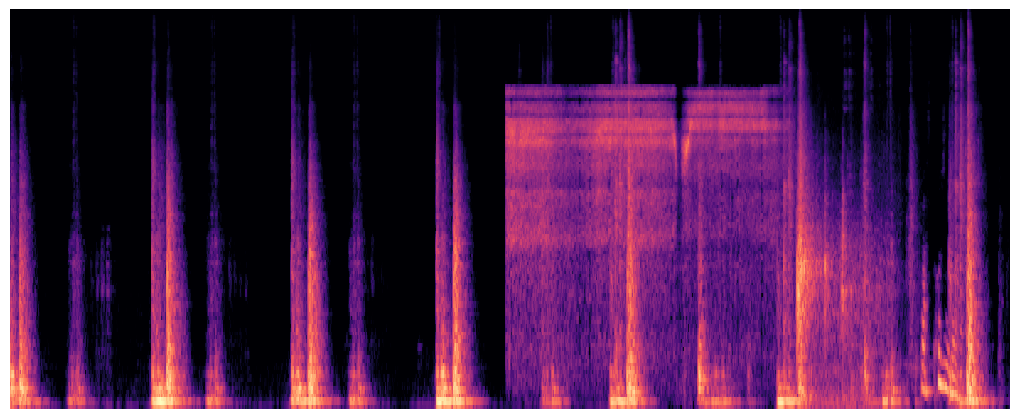

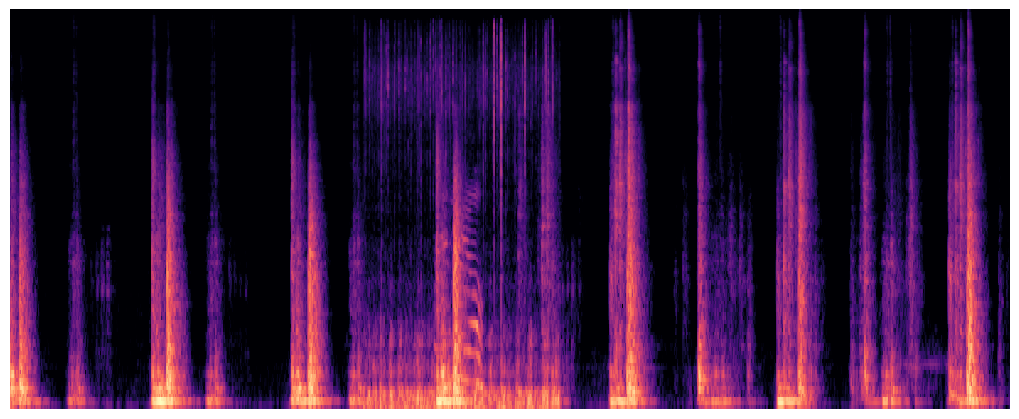

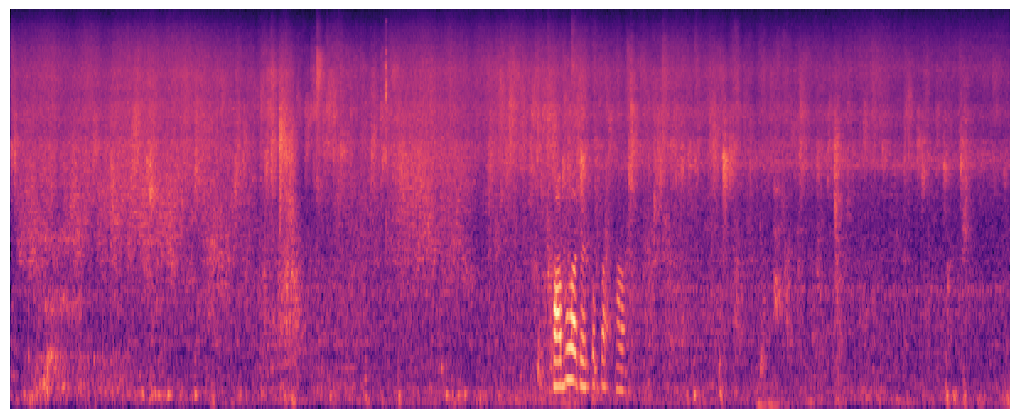

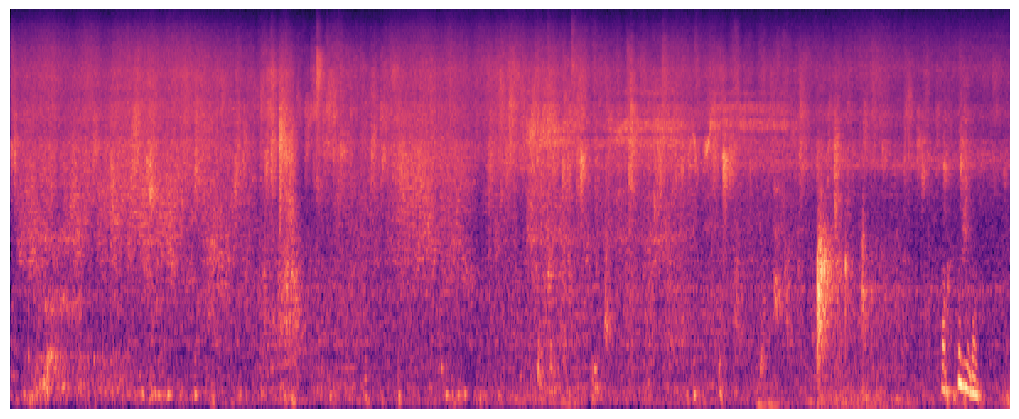

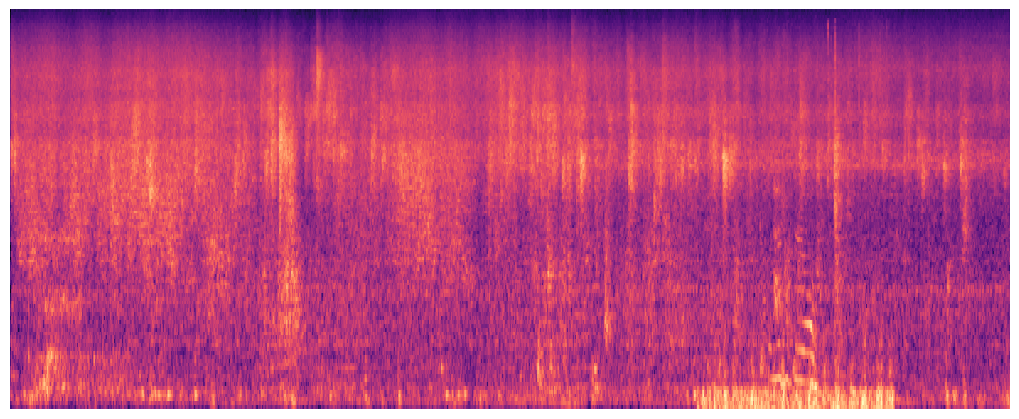

In [ ]:
# 음성 파일 불러오기
import librosa

for i in background_list:
  file = "/content/drive/MyDrive/1DL_data_p/background/" + str(i) # 15초 짜리
  b_data, b_sample_rate = librosa.load(file, sr = 48000)
  if len(b_data) / b_sample_rate < 15.0 :
    continue

  for j in event_list:
    file = "/content/drive/MyDrive/1DL_data_p/event/" + str(j) # 15초 짜리
    e_data, e_sample_rate = librosa.load(file, sr = 48000)

    start_point = random.randint(0,15 * 48000)

    zero_list = np.zeros(start_point)
    zero_long_list = np.zeros(15 * 48000)
    e_data_1 = np.concatenate((zero_list, np.array(e_data), np.array(zero_long_list)))

    e_data_1 = e_data_1[:15*48000]


    data_systehsis = 0.5 * b_data + 0.5 * e_data_1

    # 멜 스펙트로그램 계산
    S = librosa.feature.melspectrogram(y=data_systehsis, sr=b_sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

    # 파워 스펙트로그램을 dB 단위로 변환 (시각화를 위해)
    S_dB = librosa.power_to_db(S, ref=np.max)

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_position([0, 0, 1, 1]) # (모서리위치, 가로 길이, 세로 길이)
    ax.set_axis_off() # 객체 축 제거

    librosa.display.specshow(S_dB, sr=b_sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel',ax=ax)
                            # (db단위로변환멜스펙, 샘플링주파수, fft창연속된간격, x축시간, y축멜주파수, 이전에생성한axes에생성)
    plt.savefig('/content/drive/MyDrive/1DL_data_p/p_round1/' + 'mel_spectrogram' + str(i) + str(j) +'.png')

# 이미지 데이터로

In [ ]:
image_list = os.listdir('/content/drive/MyDrive/1DL_data_p/p_round1')
image_list

['mel_spectrogram.png',
 'mel_spectrogramB_문여닫는소리.wavE_전기사고_111205_label.wav.png',
 'mel_spectrogramB_문여닫는소리.wavE_가스사고_691133_label.wav.png',
 'mel_spectrogramB_문여닫는소리.wavE_화재_15456_label.wav.png',
 'mel_spectrogramB_샤워소리.wavE_전기사고_111205_label.wav.png',
 'mel_spectrogramB_샤워소리.wavE_가스사고_691133_label.wav.png']

In [ ]:
from PIL import Image

x = []
for i in range(len(image_list)):
  # 이미지 파일 열기
  image = Image.open('/content/drive/MyDrive/1DL_data_p/p_round1/' + image_list[i])
  image_array = np.array(image)
  x_data_1 = image_array[:,:,0:3]

  x.append(x_data_1)

In [ ]:
x_data = np.array(x)

In [ ]:
x_data.shape

(6, 400, 1000, 3)

In [ ]:
np.save("/content/drive/MyDrive/1DL_data_p/x_data.npy", x_data)